In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
# import seaborn as sns
import librosa
import librosa.display
import IPython


In [2]:
Crema_Path='../input/speech-emotion-recognition-en/Crema/'

In [3]:
!pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0.post2
    Uninstalling librosa-0.10.0.post2:
      Successfully uninstalled librosa-0.10.0.post2


In [42]:
import os
import pandas as pd
import librosa
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift
import numpy as np

# Define the augmentation pipeline
augmentations = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.01, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.2, p=0.3),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.3)
])

In [30]:
crema = []
for wav in sorted(os.listdir(Crema_Path)):
    emotion = wav.partition(".wav")[0].split('_')
    if emotion[2] == 'SAD':
        crema.append((emotion[0], 'sad', Crema_Path+'/'+wav, emotion[1], emotion[3]))
    elif emotion[2] == 'ANG':
        crema.append((emotion[0], 'angry', Crema_Path+'/'+wav, emotion[1], emotion[3]))
    elif emotion[2] == 'DIS':
        crema.append((emotion[0], 'disgust', Crema_Path+'/'+wav, emotion[1], emotion[3]))
    elif emotion[2] == 'FEA':
        crema.append((emotion[0], 'fear', Crema_Path+'/'+wav, emotion[1], emotion[3]))
    elif emotion[2] == 'HAP':
        crema.append((emotion[0], 'happy', Crema_Path+'/'+wav, emotion[1], emotion[3]))
    elif emotion[2] == 'NEU':
        crema.append((emotion[0], 'neutral', Crema_Path+'/'+wav, emotion[1], emotion[3]))
    else:
        crema.append((emotion[0], 'unknown', Crema_Path+'/'+wav, emotion[1], emotion[3]))

df = pd.DataFrame.from_records(crema, columns=['Person', 'Emotion', 'File_Path', 'sentence','intensity'])
df.head()


Person  Emotion                                          File_Path sentence  \
0   1001    angry  ../input/speech-emotion-recognition-en/Crema//...      DFA   
1   1001  disgust  ../input/speech-emotion-recognition-en/Crema//...      DFA   
2   1001     fear  ../input/speech-emotion-recognition-en/Crema//...      DFA   
3   1001    happy  ../input/speech-emotion-recognition-en/Crema//...      DFA   
4   1001  neutral  ../input/speech-emotion-recognition-en/Crema//...      DFA   

  intensity  
0        XX  
1        XX  
2        XX  
3        XX  
4        XX

In [46]:
df.File_Path[0]

'../input/speech-emotion-recognition-en/Crema//1001_DFA_ANG_XX.wav'

In [40]:
# Augment the DataFrame
augmented_df = augment_dataframe(df)
augmented_df.head()

/opt/conda/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'input/speech-emotion-recognition-en/Crema//1001_DFA_ANG_XX.wav'

In [4]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder 
encoder = LabelEncoder()
# Fit the encoder on the column and transform the values
df['Emotion_encoded'] = encoder.fit_transform(df['Emotion'])

# Get the mapping between original labels and encoded values
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
label_mapping

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5}

In [6]:
df

Person  Emotion                                          File_Path  \
0      1001    angry  ../input/speech-emotion-recognition-en/Crema//...   
1      1001  disgust  ../input/speech-emotion-recognition-en/Crema//...   
2      1001     fear  ../input/speech-emotion-recognition-en/Crema//...   
3      1001    happy  ../input/speech-emotion-recognition-en/Crema//...   
4      1001  neutral  ../input/speech-emotion-recognition-en/Crema//...   
...     ...      ...                                                ...   
7437   1091  disgust  ../input/speech-emotion-recognition-en/Crema//...   
7438   1091     fear  ../input/speech-emotion-recognition-en/Crema//...   
7439   1091    happy  ../input/speech-emotion-recognition-en/Crema//...   
7440   1091  neutral  ../input/speech-emotion-recognition-en/Crema//...   
7441   1091      sad  ../input/speech-emotion-recognition-en/Crema//...   

     sentence intensity  Emotion_encoded  
0         DFA        XX                0  
1         DFA        XX                1  
2         DFA        XX                2  
3         DFA        XX                3  
4         DFA        XX                4  
...       ...       ...              ...  
7437      WSI        XX                1  
7438      WSI        XX                2  
7439      WSI        XX                3  
7440      WSI        XX                4  
7441      WSI        XX                5  

[7442 rows x 6 columns]

In [7]:
df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

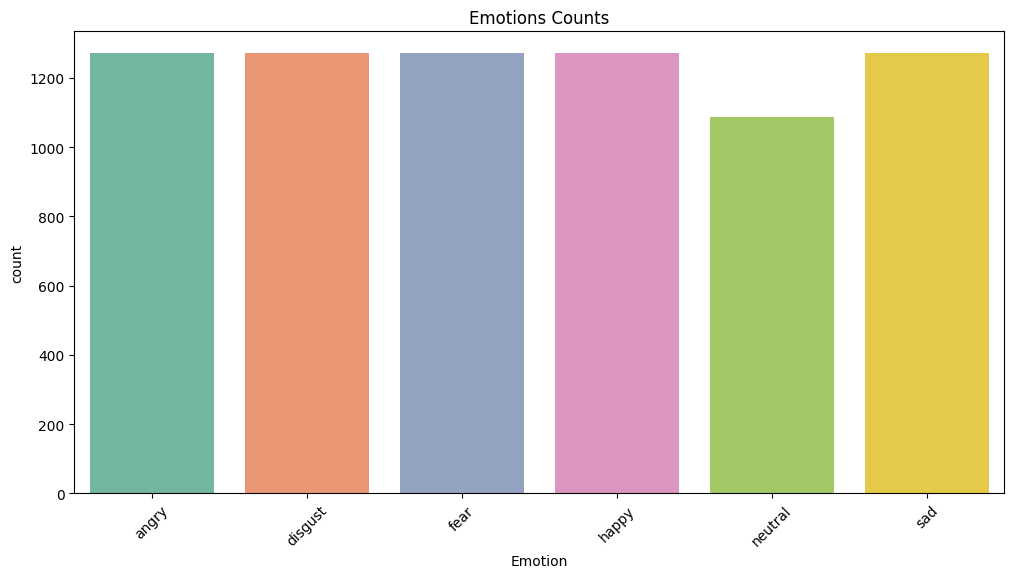

In [8]:
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [7]:
def wave_plot(data,sr,emotion):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr)

In [10]:
emotion_names=df['Emotion'].unique()

# Plotting and listening to a sample of each Emotion


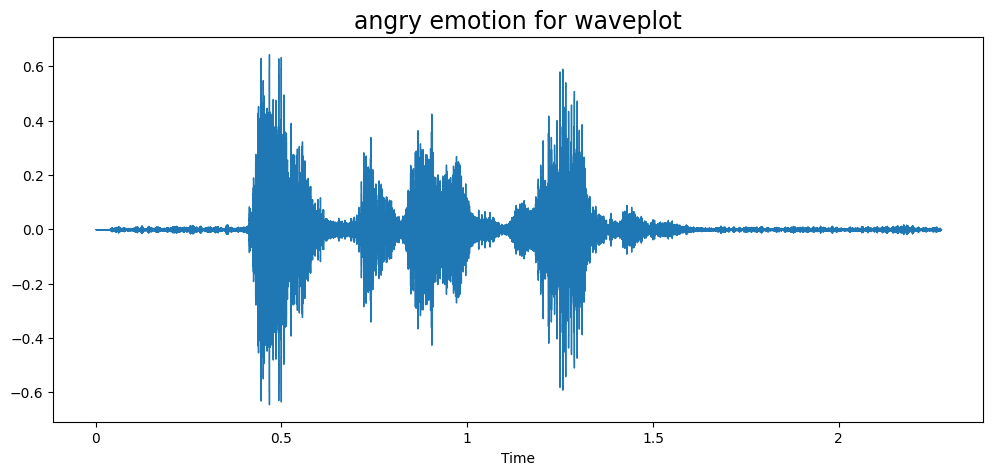

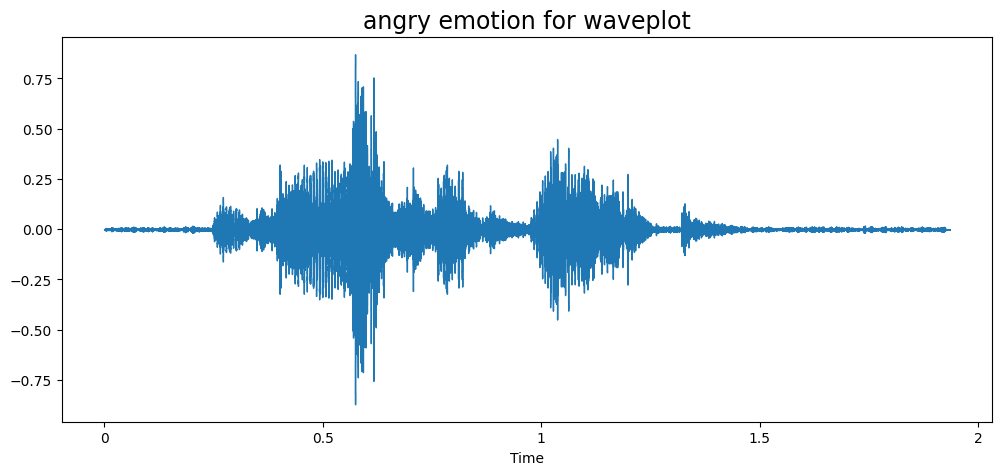

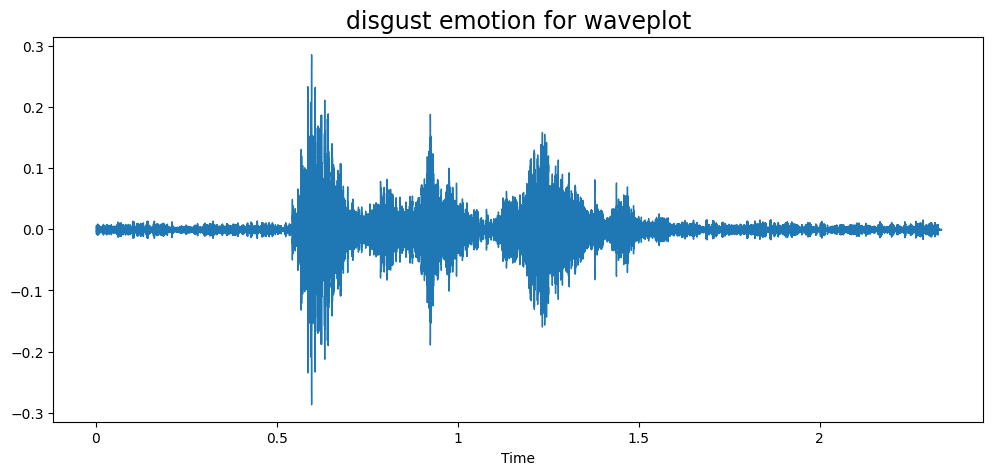

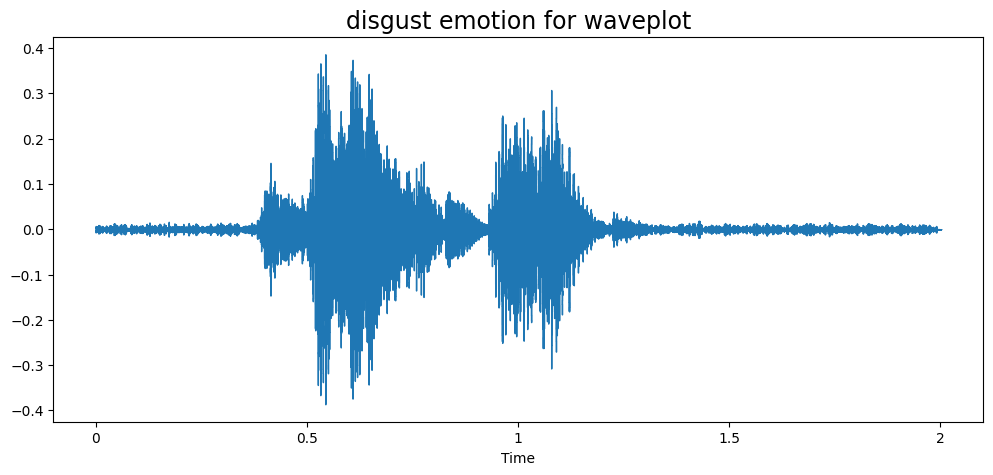

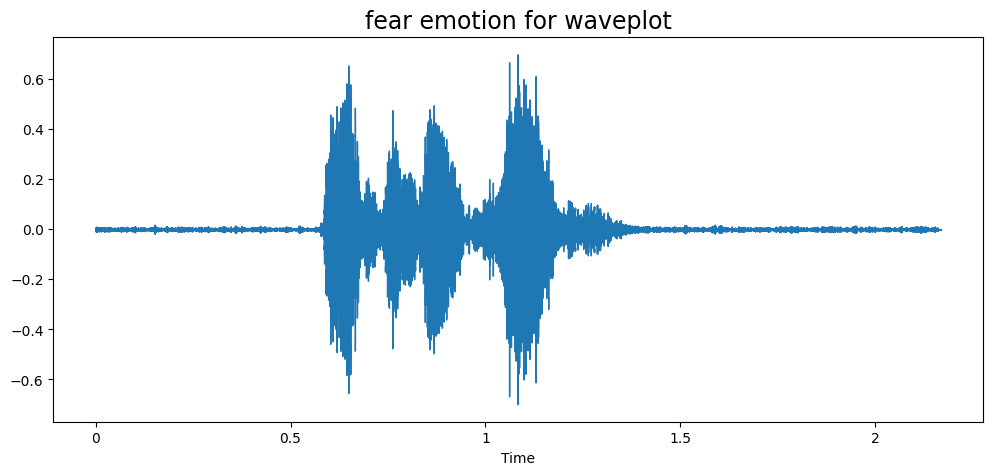

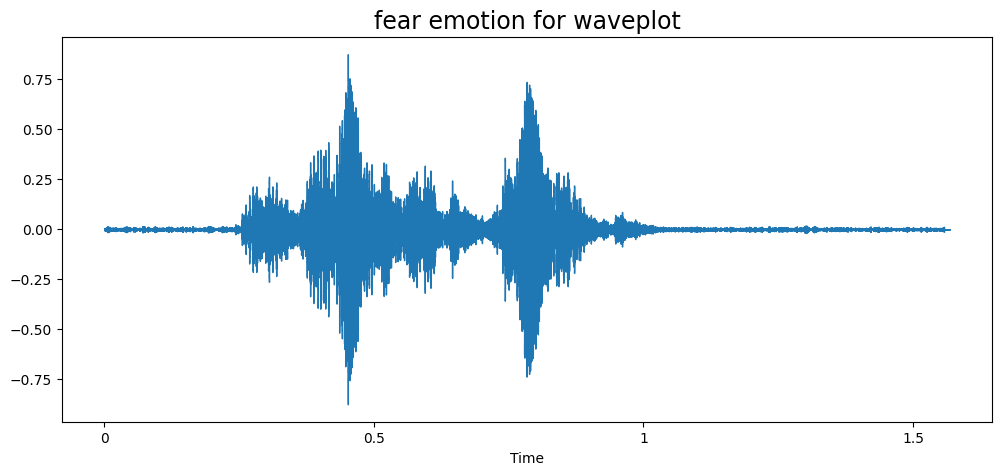

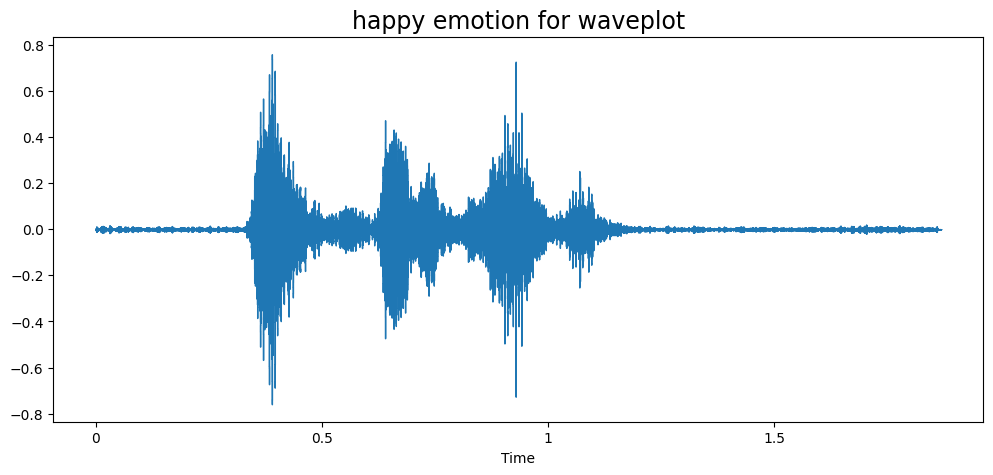

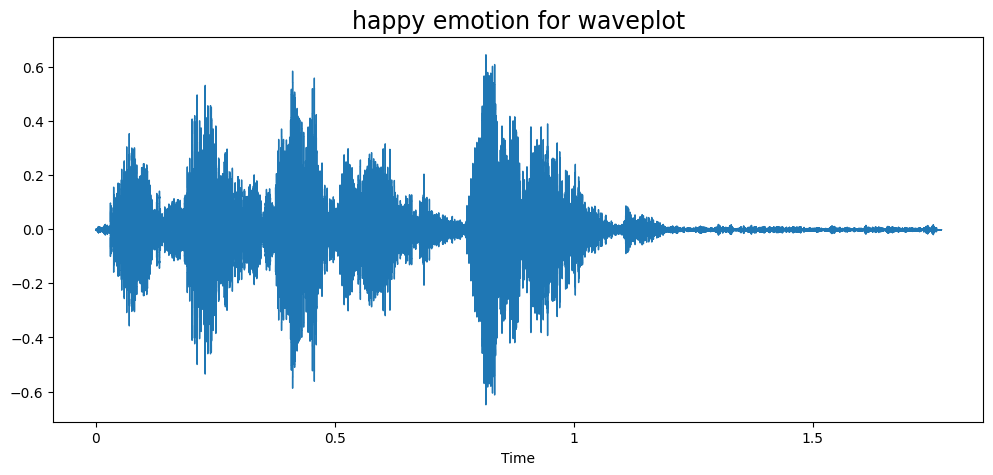

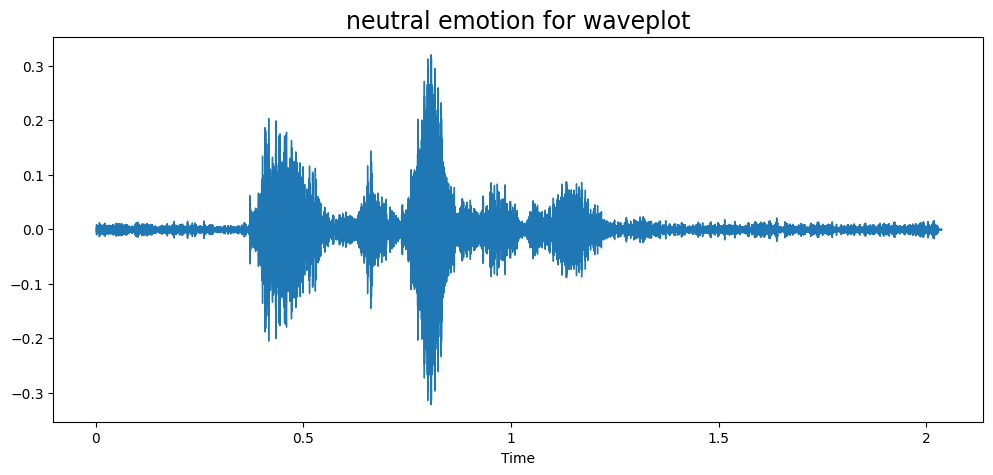

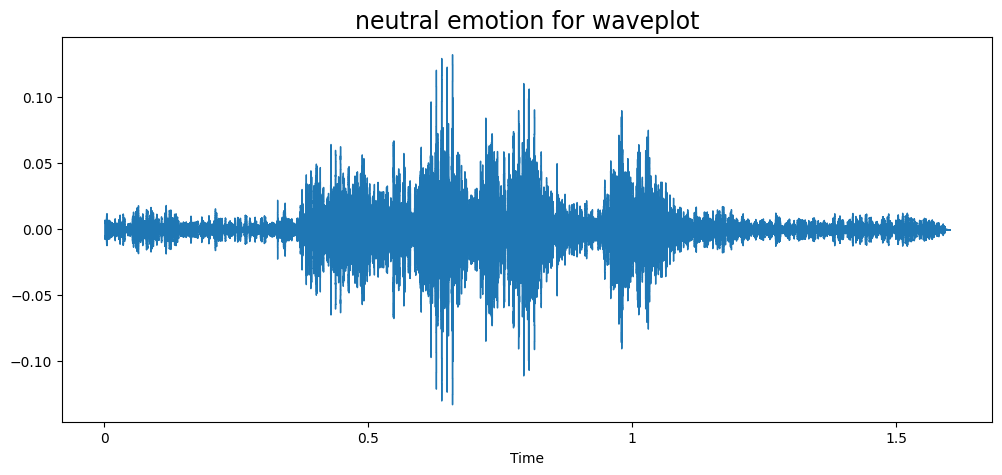

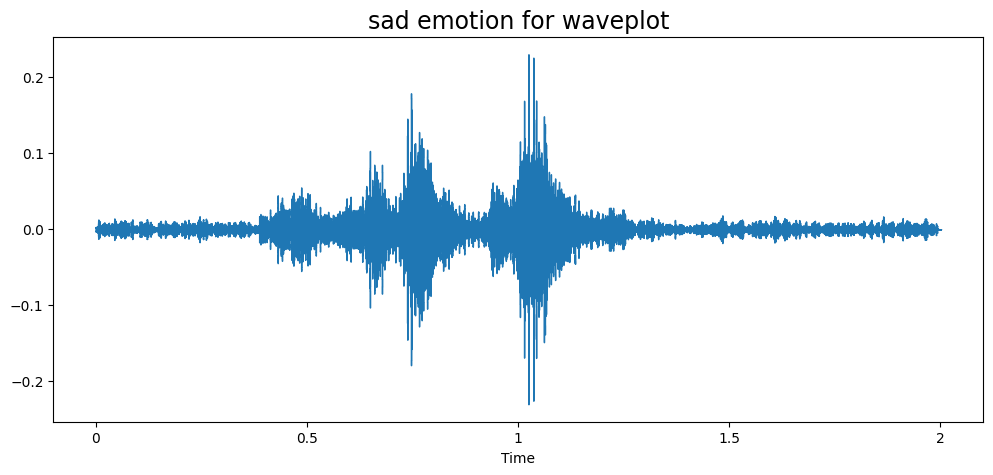

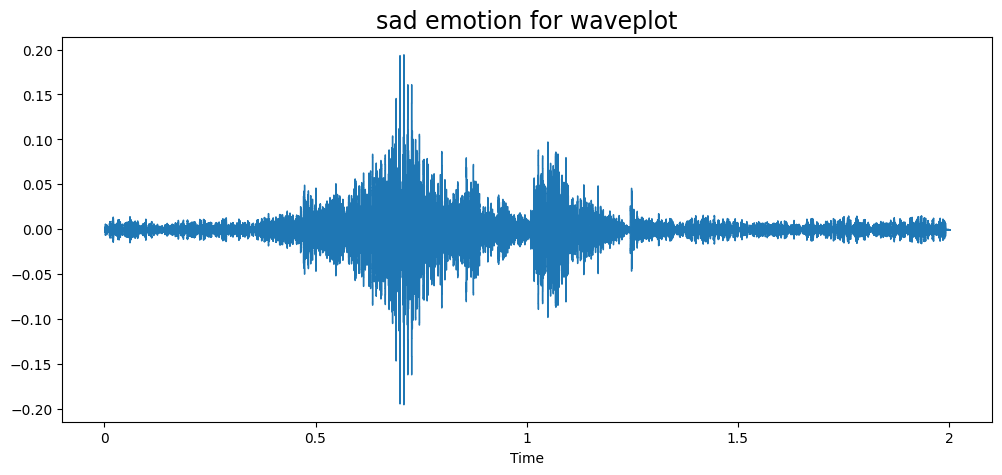

In [11]:
audio_path=[]
for emotion in emotion_names:
    paths=np.array(df['File_Path'][df['Emotion']==emotion])[:2]
    for path in paths:
        data,sr=librosa.load(path)
        wave_plot(data,sr,emotion)
        audio_path.append(path)

In [12]:
i = 0
for emotion in emotion_names:
    print(f'{emotion} Audio Sample\n')
    IPython.display.display(IPython.display.Audio(audio_path[i]))
    print(f'{emotion} Audio Sample\n')
    IPython.display.display(IPython.display.Audio(audio_path[i+1]))
    i+=2

angry Audio Sample



angry Audio Sample



disgust Audio Sample



disgust Audio Sample



fear Audio Sample



fear Audio Sample



happy Audio Sample



happy Audio Sample



neutral Audio Sample



neutral Audio Sample



sad Audio Sample



sad Audio Sample



# Data analysis

**Choosing parameters for melspectogram**

For distinguishing between different emotional states in voice recordings (such as angry, sad, and happy), a suitable value for `n_fft` can vary depending on the specific characteristics of the audio data and the analysis requirements. Here are some considerations to help you choose an appropriate `n_fft` value:

1. Emotional vocal characteristics: Different emotional states can manifest in various ways in the voice, including changes in pitch, intonation, spectral balance, and energy distribution. The relevant emotional cues may span a range of frequencies. It's important to select an `n_fft` value that captures the relevant frequency components related to emotional characteristics.

2. Spectral features: Emotional content in voice recordings can be reflected in the spectral content. Larger `n_fft` values allow for better frequency resolution, potentially capturing more subtle spectral details that differentiate emotional states. However, keep in mind that increasing `n_fft` also increases computational requirements.

3. Duration of emotional cues: Consider the duration of the emotional cues you expect to capture. If emotional information is expressed in short temporal segments, a smaller `n_fft` might be sufficient. On the other hand, if emotional cues extend over longer durations, a larger `n_fft` could be beneficial to capture more comprehensive spectral information.

4. Computational resources: Take into account the available computational resources for your analysis. Larger `n_fft` values require more processing power and memory. Ensure that your chosen `n_fft` value is computationally feasible given the constraints of your system.

While an exact value of `n_fft` cannot be determined without specific knowledge of your dataset, a value in the range of 1024 to 4096 is commonly used for speech-related analysis tasks. You can start with a default value like 2048 and adjust it based on the characteristics of your voice data and the results you obtain. It may be helpful to experiment with different `n_fft` values to find the optimal balance between capturing relevant spectral features and computational efficiency for your specific task of distinguishing between angry, sad, and happy voices.

**hop_length**

As for the specific value of hop_length, it's common to set it to a fraction of n_fft to achieve a good balance between time and frequency resolution. A typical choice is to set hop_length to half (hop_length = n_fft // 2) or a quarter (hop_length = n_fft // 4) of the n_fft value. In this case, a hop_length value of 1024 (hop_length = 2048 // 2) can be a reasonable starting point.

**n_mels**

A common practice is to set n_mels to a value between 40 and 128. The choice within this range depends on the complexity of the audio data and the specific requirements of your emotion recognition task. It's generally recommended to start with a value around 64 and adjust it based on the characteristics of your data and the performance of your models.

In [13]:
def melspectogram_wave_plot(path,emotion):
    y,sr = librosa.load(path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, n_fft=2048 ,hop_length=1024)

    S_dB = librosa.power_to_db(S)
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title=f'Mel-frequency spectrogram for {emotion} sound')

In [14]:
emotion_names

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

In [15]:
y,sr = librosa.load(audio_path[3])
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, n_fft=2048 ,hop_length=1024)
S_dB = librosa.power_to_db(S)

In [16]:
S_dB.shape

(128, 44)

In [17]:
S_dB[:,0]

array([-26.566412, -26.321106, -22.867123, -26.250378, -18.401087,
       -18.555105, -15.446691, -12.349419, -11.702301, -14.338855,
       -21.778606, -27.788994, -29.283966, -26.011963, -34.707245,
       -33.275394, -32.67677 , -30.671898, -32.74256 , -33.96981 ,
       -32.78266 , -33.021187, -32.250687, -33.595078, -33.434593,
       -27.002857, -26.961021, -32.45958 , -36.09117 , -43.66945 ,
       -37.542206, -34.509586, -35.327415, -36.196552, -35.11264 ,
       -35.644936, -37.926292, -40.152428, -46.45908 , -38.156185,
       -41.012817, -39.85406 , -39.074368, -40.089256, -37.91966 ,
       -39.355118, -40.188656, -42.656227, -41.42143 , -40.617325,
       -39.15052 , -42.59188 , -48.11676 , -48.961075, -44.78578 ,
       -42.96485 , -45.545006, -40.80899 , -41.325573, -39.173885,
       -38.46862 , -39.870613, -41.849884, -46.6977  , -39.8958  ,
       -44.78125 , -47.57143 , -48.05066 , -46.849308, -46.302483,
       -42.191586, -43.720436, -47.38315 , -44.70798 , -45.437

In [18]:
S_dB[:,]

array([[-26.566412, -26.269596, -33.407448, ..., -29.977362, -27.556843,
        -30.629606],
       [-26.321106, -20.978308, -31.365833, ..., -26.043587, -24.347073,
        -31.515982],
       [-22.867123, -17.791075, -19.386156, ..., -18.876392, -14.418661,
        -24.4859  ],
       ...,
       [-58.741497, -58.741497, -58.741497, ..., -58.741497, -58.741497,
        -58.741497],
       [-58.741497, -58.741497, -58.741497, ..., -58.741497, -58.741497,
        -58.741497],
       [-58.741497, -58.741497, -58.741497, ..., -58.741497, -58.741497,
        -58.741497]], dtype=float32)

In [19]:
y.shape

(44145,)

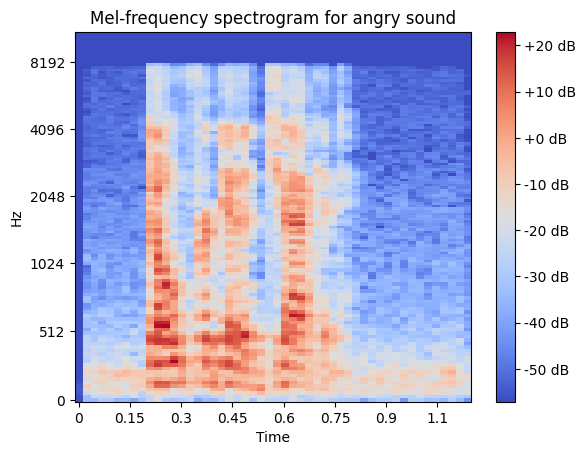

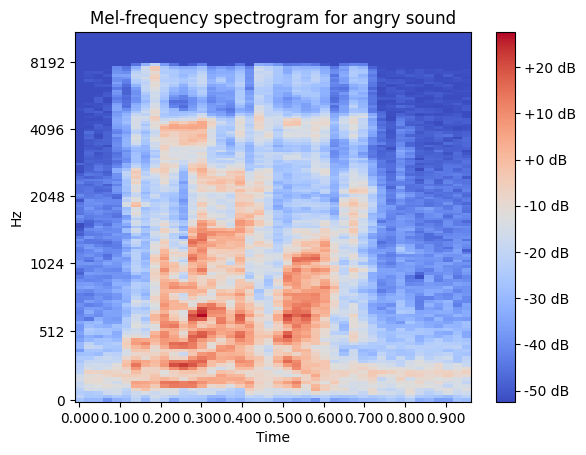

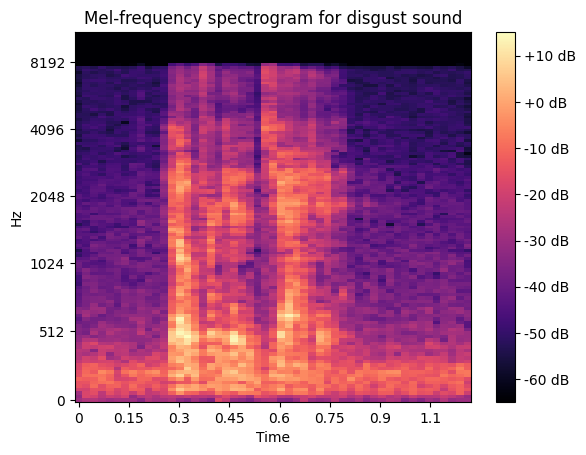

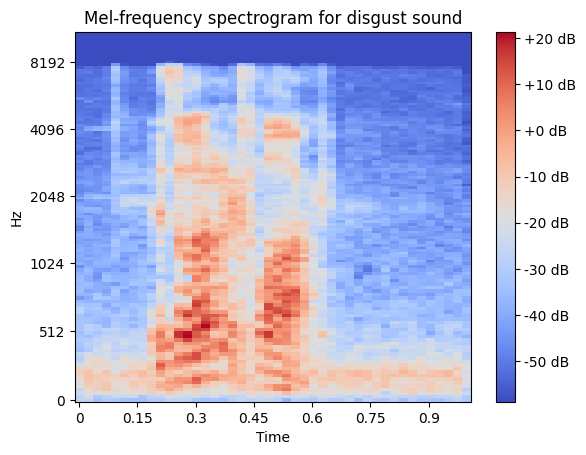

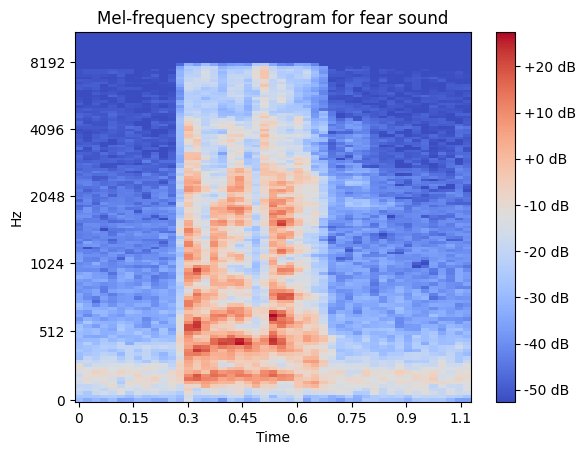

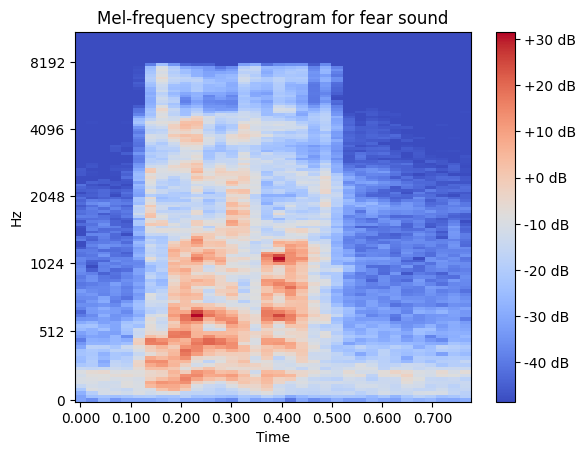

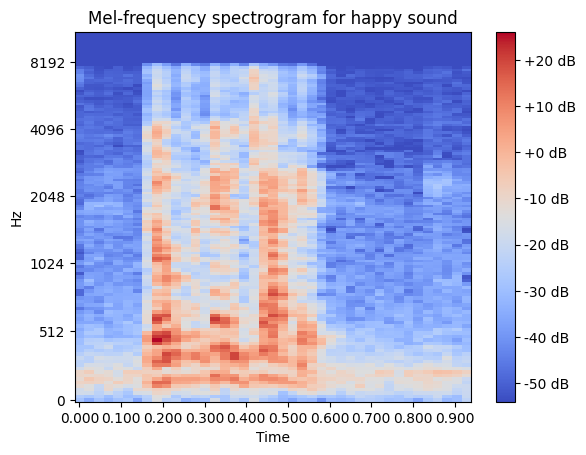

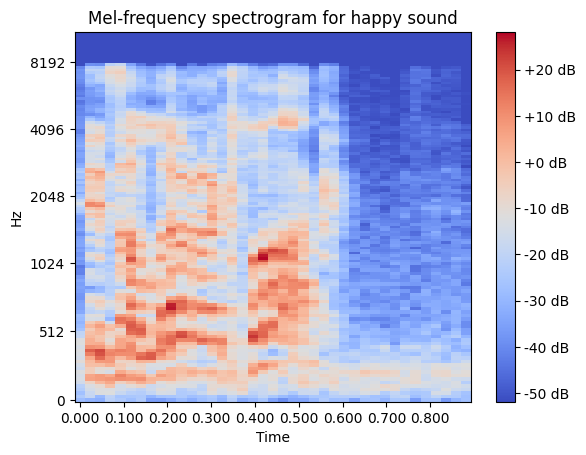

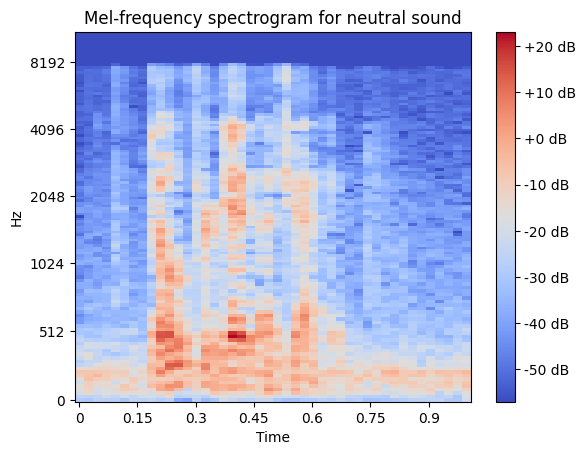

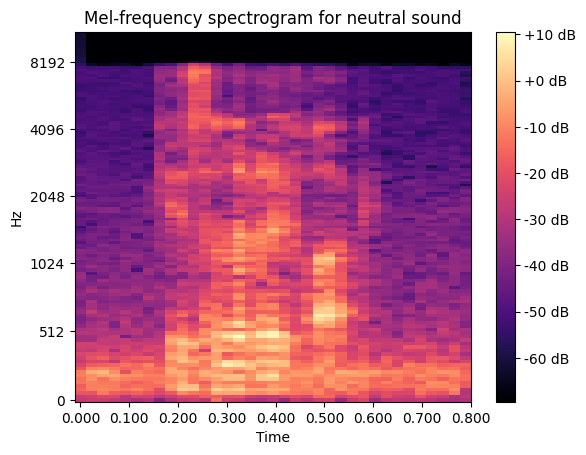

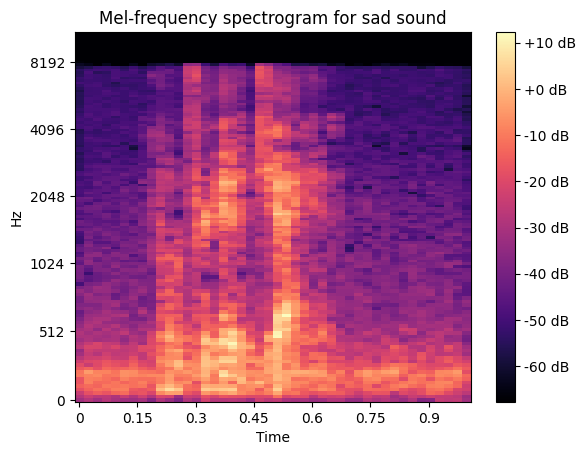

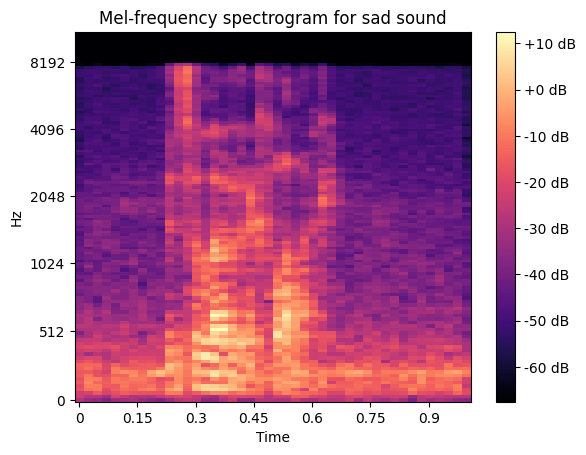

In [20]:
for idx in range(0, len(audio_path), 2):
    melspectogram_wave_plot(audio_path[idx],emotion_names[idx//2])
    melspectogram_wave_plot(audio_path[idx+1],emotion_names[idx//2])

In [21]:
guy1_df=df[df['Person']=="1001"]

guy1=np.array(guy1_df['File_Path'])

angry


disgust


fear


happy


neutral


sad


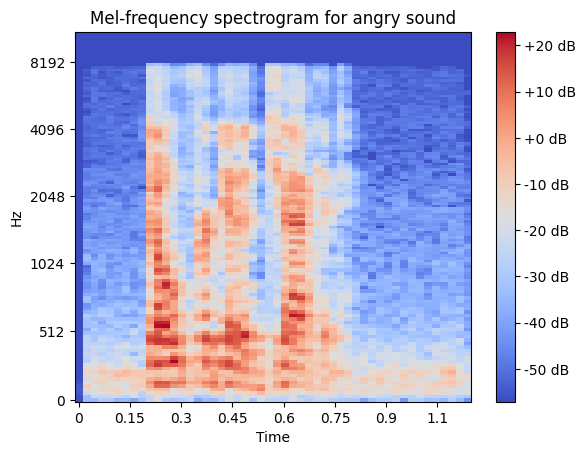

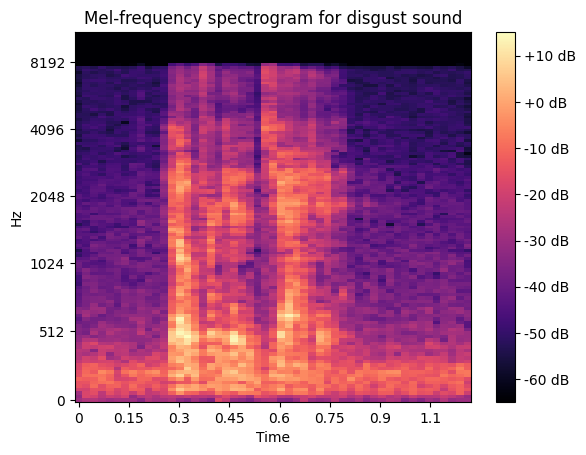

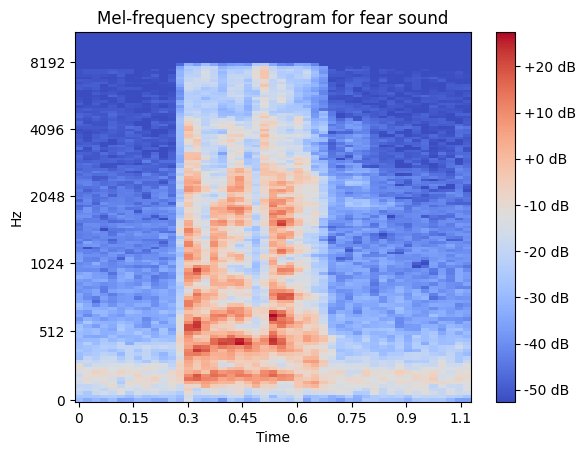

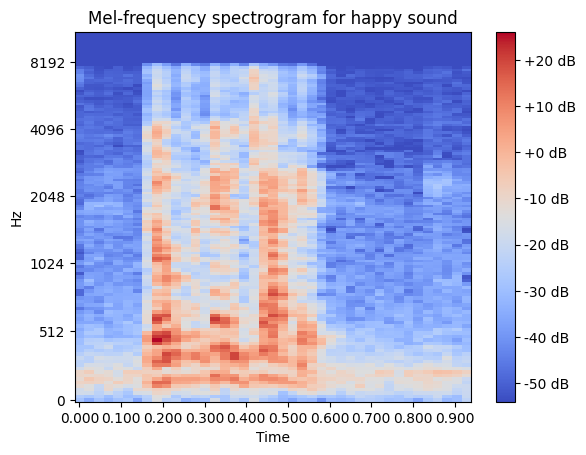

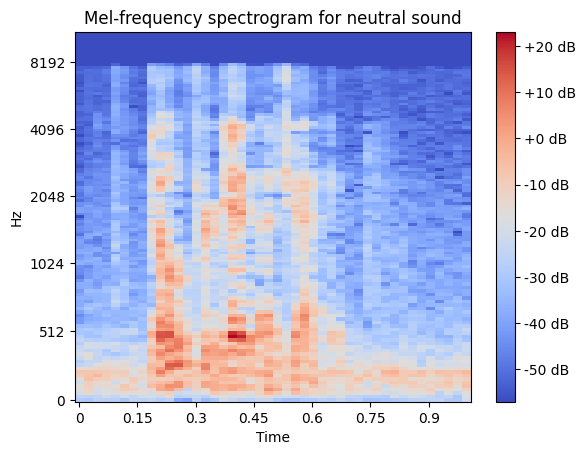

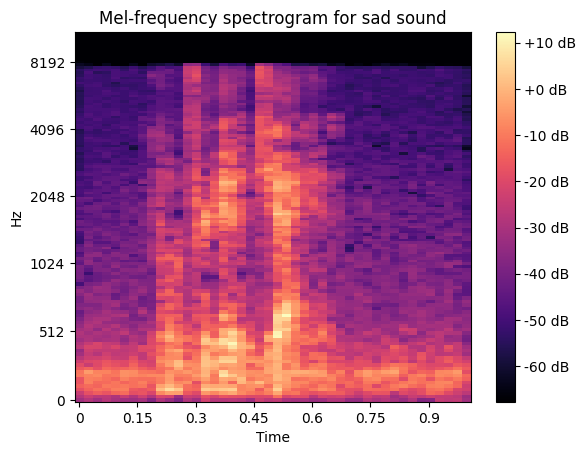

In [22]:
c=0
for idx,path in enumerate(guy1):
    emotion=guy1_df['Emotion'][idx]
    print(emotion)
    IPython.display.display(IPython.display.Audio(path))
    melspectogram_wave_plot(path,emotion)
    if c==5:
        break
    c+=1

angry


disgust


fear


happy


neutral


sad


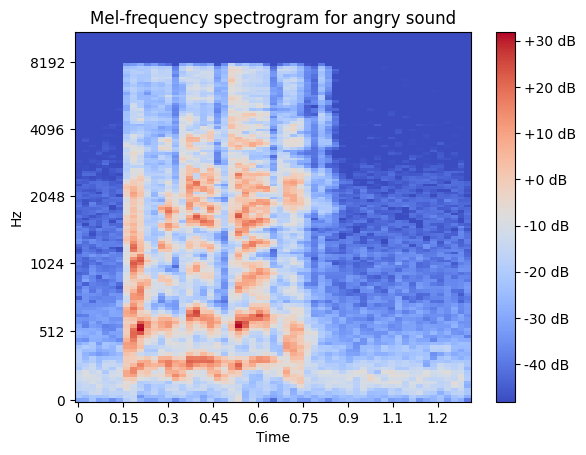

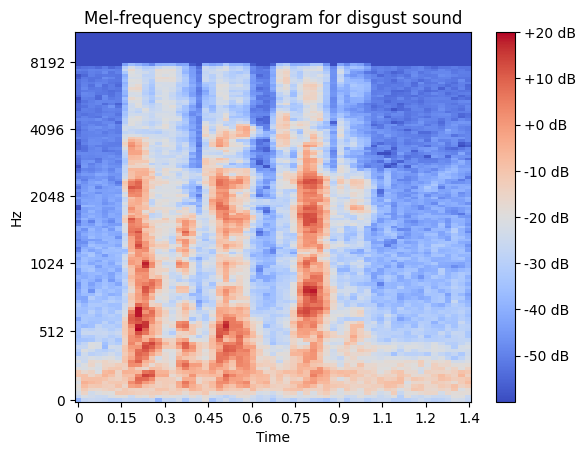

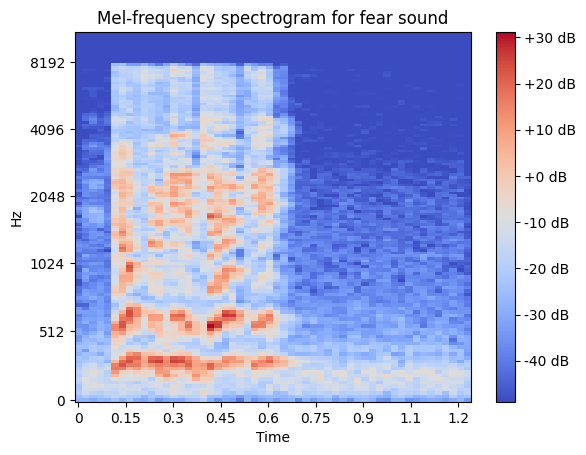

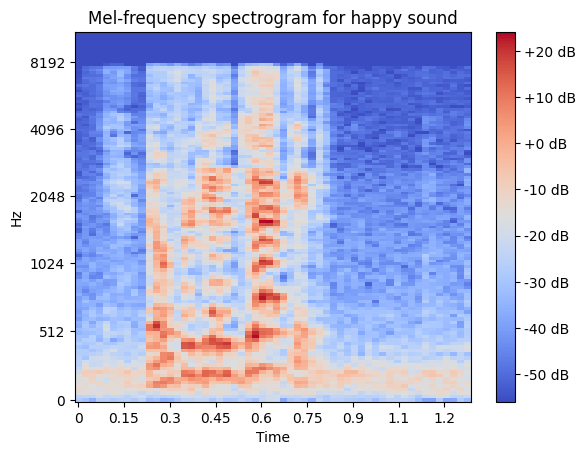

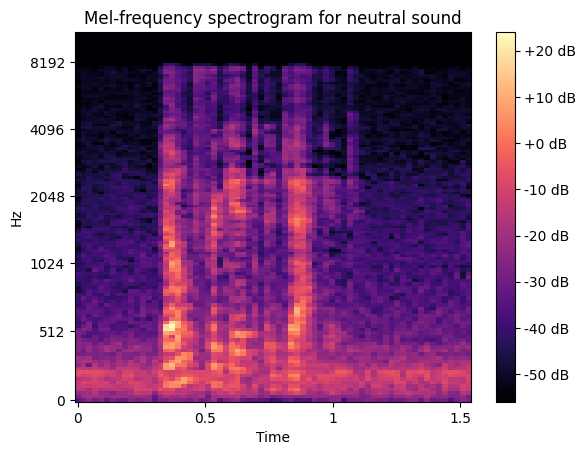

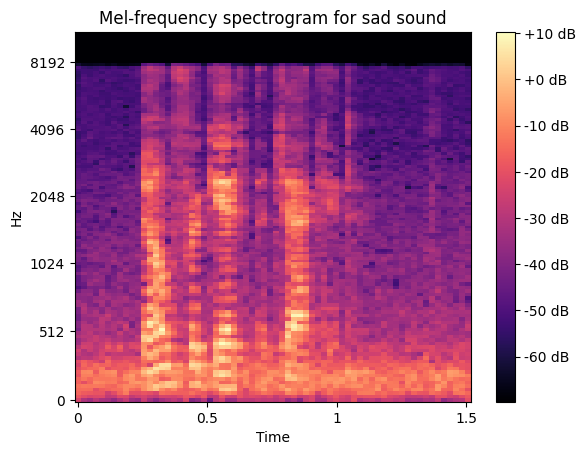

In [23]:
guy2_df=df[df['Person']=="1005"].reset_index()

guy2=np.array(guy2_df['File_Path'])
c=0
for idx,path in enumerate(guy2):
    emotion=guy2_df['Emotion'][idx]
    print(emotion)
    IPython.display.display(IPython.display.Audio(path))
    melspectogram_wave_plot(path,emotion)
    if c==5:
        break
    c+=1

In [24]:
df

Person  Emotion                                          File_Path  \
0      1001    angry  ../input/speech-emotion-recognition-en/Crema//...   
1      1001  disgust  ../input/speech-emotion-recognition-en/Crema//...   
2      1001     fear  ../input/speech-emotion-recognition-en/Crema//...   
3      1001    happy  ../input/speech-emotion-recognition-en/Crema//...   
4      1001  neutral  ../input/speech-emotion-recognition-en/Crema//...   
...     ...      ...                                                ...   
7437   1091  disgust  ../input/speech-emotion-recognition-en/Crema//...   
7438   1091     fear  ../input/speech-emotion-recognition-en/Crema//...   
7439   1091    happy  ../input/speech-emotion-recognition-en/Crema//...   
7440   1091  neutral  ../input/speech-emotion-recognition-en/Crema//...   
7441   1091      sad  ../input/speech-emotion-recognition-en/Crema//...   

     sentence intensity  Emotion_encoded  
0         DFA        XX                0  
1         DFA        XX                1  
2         DFA        XX                2  
3         DFA        XX                3  
4         DFA        XX                4  
...       ...       ...              ...  
7437      WSI        XX                1  
7438      WSI        XX                2  
7439      WSI        XX                3  
7440      WSI        XX                4  
7441      WSI        XX                5  

[7442 rows x 6 columns]

In [268]:
def add_awgn_to_audio(file_path, noise_mean=0, noise_std=0.05):
    # Load audio file using librosa
    y, sr = librosa.load(file_path)
    
    # Generate AWGN
    noise = np.random.normal(noise_mean, noise_std, len(y))
    
    # Add AWGN to audio
    noisy_audio = y + noise
    
    return noisy_audio, sr

In [282]:
S_dB_Total=[]
S_dB_noisy_total=[]
for path in df.File_Path.to_list():
    y,sr = librosa.load(path)
    
    y_noisy,sr_noisy=add_awgn_to_audio(path)
    
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, n_fft=2048 ,hop_length=1024)
    S_dB = librosa.power_to_db(S)
    
    S_Noisy = librosa.feature.melspectrogram(y=y_noisy, sr=sr_noisy, n_mels=128, n_fft=2048 ,hop_length=1024)
    S_dB_Noisy = librosa.power_to_db(S_Noisy)

    
    S_dB_Total.append(S_dB)
    S_dB_noisy_total.append(S_dB_Noisy)

In [283]:
S_dB_Total[7].shape

(128, 45)

In [284]:
len(S_dB_Total)

7442

In [285]:
len(S_dB_noisy)

7442

In [286]:
S_dB_noisy[0].shape

(128, 50)

In [287]:
sizes=[]
for x in S_dB_Total:
    sizes.append(x.shape[1])

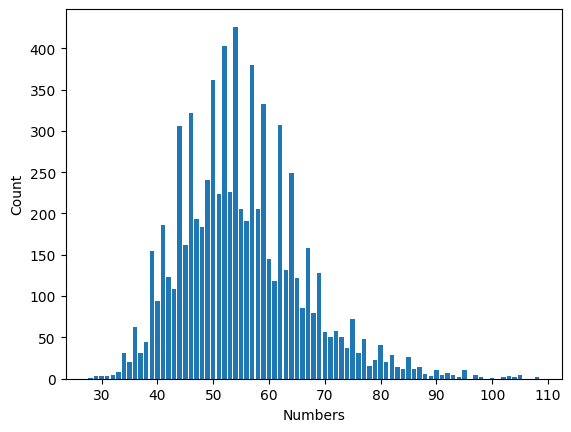

min is 28
max is 108


In [288]:
# Calculate the bin counts
bincount_array = np.histogram(sizes, bins=np.arange(min(sizes), max(sizes)+2))[0]

# Create a list of labels for the x-axis
x_labels = np.arange(min(sizes), max(sizes)+1)

# Plot the bin counts as a bar plot
plt.bar(x_labels, bincount_array)

# Set labels and title
plt.xlabel('Numbers')
plt.ylabel('Count')
plt.show()

print(f'min is {min(sizes)}')
print(f'max is {max(sizes)}')


In [289]:
padding_length = 110
padded_list = []
for array in S_dB_Total:
    current_shape = array.shape
    padding = [(0, 0), (0, padding_length - current_shape[1])]
    padded_array = np.pad(array, padding, mode='constant', constant_values=0)
    padded_list.append(padded_array)

# Convert the padded list to a NumPy array
data_2D = np.array(padded_list)
    

In [29]:
S_dB_Noisy[0].shape

NameError: name 'S_dB_Noisy' is not defined

In [290]:
padding_length = 110
padded_list = []
for array in S_dB_Noisy:
    current_shape = array.shape
    padding = [(0, 0), (0, padding_length - current_shape[1])]
    padded_array = np.pad(array, padding, mode='constant', constant_values=0)
    padded_list.append(padded_array)

# Convert the padded list to a NumPy array
data_2D_noisy = np.array(padded_list)
    

IndexError: tuple index out of range

In [32]:
data_2D.shape

(7442, 128, 110)

In [33]:
data_2D[0]

array([[-56.54471 , -33.54408 , -34.05128 , ...,   0.      ,   0.      ,
          0.      ],
       [-55.860237, -32.93473 , -23.03572 , ...,   0.      ,   0.      ,
          0.      ],
       [-54.649105, -22.622345, -19.051712, ...,   0.      ,   0.      ,
          0.      ],
       ...,
       [-57.10666 , -57.10666 , -57.10666 , ...,   0.      ,   0.      ,
          0.      ],
       [-57.10666 , -57.10666 , -57.10666 , ...,   0.      ,   0.      ,
          0.      ],
       [-57.10666 , -57.10666 , -57.10666 , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)

In [34]:
#normalization
from sklearn.preprocessing import MinMaxScaler

# Reshape the array to 2D
reshaped_data = data_2D.reshape((-1, 1))

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(reshaped_data)

# Reshape the normalized data back to the original shape
normalized_data = normalized_data.reshape(data_2D.shape)


In [35]:
normalized_data[0]

array([[0.30892226, 0.47243297, 0.4688273 , ..., 0.71089673, 0.71089673,
        0.71089673],
       [0.31378815, 0.47676483, 0.54713655, ..., 0.71089673, 0.71089673,
        0.71089673],
       [0.32239807, 0.55007523, 0.57545877, ..., 0.71089673, 0.71089673,
        0.71089673],
       ...,
       [0.30492738, 0.30492738, 0.30492738, ..., 0.71089673, 0.71089673,
        0.71089673],
       [0.30492738, 0.30492738, 0.30492738, ..., 0.71089673, 0.71089673,
        0.71089673],
       [0.30492738, 0.30492738, 0.30492738, ..., 0.71089673, 0.71089673,
        0.71089673]], dtype=float32)

In [36]:
data=np.expand_dims(normalized_data, axis=1)

In [37]:
data.shape

(7442, 1, 128, 110)

In [38]:
labels=df.Emotion_encoded.to_numpy()
labels.shape

(7442,)

In [39]:
# Shuffle the indices
shuffled_indices = np.random.permutation(len(data))

# Use the shuffled indices to shuffle both arrays
shuffled_data = data[shuffled_indices]
shuffled_labels = labels[shuffled_indices]

In [40]:
# Number of training examples
train_set_size = int(len(data) * 0.8)
print(f"Number of Training Examples: {train_set_size}")

validation_set_size = int(len(data) * 0.1)
print(f"Number of Validation Examples: {validation_set_size}")

test_set_size = len(data) - train_set_size - validation_set_size
print(f"Number of Testing Examples: {test_set_size}")


Number of Training Examples: 5953
Number of Validation Examples: 744
Number of Testing Examples: 745


In [41]:
shuffled_data.shape

(7442, 1, 128, 110)

In [42]:
X_train=shuffled_data[:train_set_size]
y_train=shuffled_labels[:train_set_size]

X_test=shuffled_data[:test_set_size]
y_test=shuffled_labels[:test_set_size]

X_val=shuffled_data[train_set_size:train_set_size+validation_set_size]
y_val=shuffled_labels[train_set_size:train_set_size+validation_set_size]

In [43]:
from torch.utils.data import Dataset, DataLoader

class AudioDataset(Dataset):
    def __init__(self,audio,label):
        self.audios=audio
        self.labels=label

    def __len__(self):
        return len(self.audios)

    def get_batch_imgs(self, idx):
        # Fetch a batch of inputs
        return self.audios[idx]
    
    def get_batch_labels(self, idx):
    # Fetch a batch of inputs
        return self.labels[idx]

    
    def __getitem__(self, index):
        audios=self.get_batch_imgs(index)
        labels=self.get_batch_labels(index)
        return audios,labels


In [44]:
train_dataset = AudioDataset(X_train,y_train)
val_dataset = AudioDataset(X_val, y_val)
test_dataset = AudioDataset(X_test, y_test)

# Create a DataLoader from the dataset

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader=DataLoader(val_dataset, batch_size=64, shuffle=True)
test_dataloader=DataLoader(test_dataset, batch_size=64, shuffle=False)


# Architecture

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from tqdm import tqdm

In [43]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
#         self.network = nn.Sequential(
#             nn.Conv2d(1, 512, kernel_size=5, stride=1), #input shape is (128, 110,1) o/p ->(124,106,512)
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=5, stride=2), # i/p:(124,106,512) o/p-> (60,51,512)
#             nn.Conv2d(512, 512, kernel_size=5, stride=1), #input shape is (60,51,512) o/p ->(56,47,512)
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=5, stride=2), # i/p:(56,47,512) o/p-> (26,22,512)
#             nn.Conv2d(512, 128, kernel_size=5, stride=1), #input shape is (26,22,512) o/p ->(22,18,128)
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=5, stride=2), # i/p:(22,18,128) o/p-> (9,7,128)
#             nn.Flatten(), # i/p:(9,7,128) o/p-> (9*7*128,)
#             nn.Linear(9*7*128, 265),
#             nn.ReLU(),
#             nn.Linear(265,6),
#             nn.Softmax()
#         )
        self.conv1 = nn.Sequential(nn.Conv2d(in_channels=1
                                   ,out_channels=16,
                                   kernel_size=3,
                                   stride=1,
                                   padding=2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )#input shape is (128, 110,1) o/p ->(65,56,16)
        self.conv2 = nn.Sequential(nn.Conv2d(in_channels=16
                               ,out_channels=32,
                               kernel_size=3,
                               stride=1,
                               padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2)
    )#input shape is (65,56,16) o/p ->(33,29,32)
        self.conv3 = nn.Sequential(nn.Conv2d(in_channels=32
                           ,out_channels=64,
                           kernel_size=3,
                           stride=1,
                           padding=2),
nn.ReLU(),
nn.MaxPool2d(kernel_size=2)
)#input shape is (33,29,32) o/p ->(17,15,64)
        
        self.conv4 = nn.Sequential(nn.Conv2d(in_channels=64
                           ,out_channels=128,
                           kernel_size=3,
                           stride=1,
                           padding=2),
nn.ReLU(),
nn.MaxPool2d(kernel_size=2)
)#input shape is (17,15,64) o/p ->(9,8,128)

        self.flatten=nn.Flatten()
        self.linear=nn.Linear(9 * 8 * 128 , 6)
        self.softmax=nn.Softmax(dim=1)
    

        
    def forward(self,x):
        x=self.conv1(x)
        x=self.conv2(x)
        x=self.conv3(x)
        x=self.conv4(x)
        x=self.flatten(x)
        logits = self.linear(x)
        predictions=self.softmax(logits)
        return predictions

In [14]:
#change nn.sequential to take dict to make more readable 

class parallel_all_you_want(nn.Module):
    # Define all layers present in the network
    def __init__(self,num_emotions):
        super().__init__() 
        
        ################ TRANSFORMER BLOCK #############################
        # maxpool the input feature map/tensor to the transformer 
        # a rectangular kernel worked better here for the rectangular input spectrogram feature map/tensor
        self.transformer_maxpool = nn.MaxPool2d(kernel_size=[1,4], stride=[1,4])
        
        # define single transformer encoder layer
        # self-attention + feedforward network from "Attention is All You Need" paper
        # 4 multi-head self-attention layers each with 128-->512--->128 feedforward network
        transformer_layer = nn.TransformerEncoderLayer(
            d_model=128, # input feature (frequency) dim after maxpooling 128*110 -> 128*27 (Melspectorgram*time)
            nhead=4, # 4 self-attention layers in each multi-head self-attention layer in each encoder block
            dim_feedforward=512, # 2 linear layers in each encoder block's feedforward network: dim 128-->512--->128
            dropout=0.4, 
            activation='relu' # ReLU: avoid saturation/tame gradient/reduce compute time
        )
        
        # I'm using 4 instead of the 6 identical stacked encoder layrs used in Attention is All You Need paper
        # Complete transformer block contains 4 full transformer encoder layers (each w/ multihead self-attention+feedforward)
        self.transformer_encoder = nn.TransformerEncoder(transformer_layer, num_layers=4)
        
        ############### 1ST PARALLEL 2D CONVOLUTION BLOCK ############
        # 3 sequential conv2D layers: (1,128,110) --> (16,64,55) -> (32,15,13) -> (64,4,3)
        self.conv2Dblock1 = nn.Sequential(
            
            # 1st 2D convolution layer
            nn.Conv2d(
                in_channels=1, # input volume depth == input channel dim == 1
                out_channels=16, # expand output feature map volume's depth to 16
                kernel_size=3, # typical 3*3 stride 1 kernel
                stride=1,
                padding=1
                      ),  #(1,128,110) - > (16,128,110)
            nn.BatchNorm2d(16), # batch normalize the output feature map before activation
            nn.ReLU(), # feature map --> activation map
            nn.MaxPool2d(kernel_size=2, stride=2), #typical maxpool kernel size  #(16,128,110) - > (16,64,55)
            nn.Dropout(p=0.3), #randomly zero 30% of 1st layer's output feature map in training
            
            # 2nd 2D convolution layer identical to last except output dim, maxpool kernel
            nn.Conv2d(
                in_channels=16, 
                out_channels=32, # expand output feature map volume's depth to 32
                kernel_size=3,
                stride=1,
                padding=1
                      ),#(16,64,55) - > (32,64,55)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4), # increase maxpool kernel for subsequent filters #(32,64,55) - > (32,15,13)
            nn.Dropout(p=0.3), 
            
            # 3rd 2D convolution layer identical to last except output dim
            nn.Conv2d(
                in_channels=32,
                out_channels=64, # expand output feature map volume's depth to 64
                kernel_size=3,
                stride=1,
                padding=1
                      ),#(64,15,13) - > (64,15,13)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),#(64,15,13) - > (64,3,3)
            nn.Dropout(p=0.3),
        )
        ############### 2ND PARALLEL 2D CONVOLUTION BLOCK ############
        # 3 sequential conv2D layers: (1,128,110) --> (16,64,55) -> (32,15,13) -> (64,4,3)
        self.conv2Dblock2 = nn.Sequential(
            # 1st 2D convolution layer
            nn.Conv2d(
                in_channels=1, # input volume depth == input channel dim == 1
                out_channels=16, # expand output feature map volume's depth to 16
                kernel_size=3, # typical 3*3 stride 1 kernel
                stride=1,
                padding=1
                      ),#(1,128,110) - > (16,128,110)
            nn.BatchNorm2d(16), # batch normalize the output feature map before activation
            nn.ReLU(), # feature map --> activation map
            nn.MaxPool2d(kernel_size=2, stride=2), #typical maxpool kernel size (16,128,110) - > (16,64,55)
            nn.Dropout(p=0.3), #randomly zero 30% of 1st layer's output feature map in training
            
            # 2nd 2D convolution layer identical to last except output dim, maxpool kernel
            nn.Conv2d(
                in_channels=16, 
                out_channels=32, # expand output feature map volume's depth to 32
                kernel_size=3,
                stride=1,
                padding=1
                      ),#(16,64,55) - > (32,64,55)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4), # increase maxpool kernel for subsequent filters (32,64,55) - > (32,15,13)
            nn.Dropout(p=0.3), 
            
            # 3rd 2D convolution layer identical to last except output dim
            nn.Conv2d(
                in_channels=32,
                out_channels=64, # expand output feature map volume's depth to 64
                kernel_size=3,
                stride=1,
                padding=1
                      ),#(32,64,55) - > (64,15,13)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),#(64,15,13) - > (64,4,3)
            nn.Dropout(p=0.3),
        )

        ################# FINAL LINEAR BLOCK ####################
        # Linear softmax layer to take final concatenated embedding tensor 
        #    from parallel 2D convolutional and transformer blocks, output 6 logits 
        # Each full convolution block outputs (64*4*3) embedding flattened to dim 576 1D array 
        
        
        # Full transformer block outputs 128*27 feature map, which we time-avg to dim 128 1D array
        # 576*2+128 == 1280 input features --> 6 output emotions 
        self.fc1_linear = nn.Linear(768*2+128,num_emotions) 
        
        ### Softmax layer for the 6 output logits from final FC linear layer 
        self.softmax_out = nn.Softmax(dim=1) # dim==1 is the freq embedding
        
    # define one complete parallel fwd pass of input feature tensor thru 2*conv+1*transformer blocks
    def forward(self,x):
        
        ############ 1st parallel Conv2D block: 4 Convolutional layers ############################
        # create final feature embedding from 1st convolutional layer 
        # input features pased through 4 sequential 2D convolutional layers
        conv2d_embedding1 = self.conv2Dblock1(x) # x == N/batch * channel * freq * time
        
        
#         print(f'conv2d_embedding1 (64,3,3)= {conv2d_embedding1.shape}')

        # flatten final 64*1*8 feature map from convolutional layers to length 512 1D array 
        # skip the 1st (N/batch) dimension when flattening
        conv2d_embedding1 = torch.flatten(conv2d_embedding1, start_dim=1) 
#         print(f'conv2d_embedding1 After flatten= {conv2d_embedding1.shape}')

        ############ 2nd parallel Conv2D block: 4 Convolutional layers #############################
        # create final feature embedding from 2nd convolutional layer 
        # input features pased through 4 sequential 2D convolutional layers
        conv2d_embedding2 = self.conv2Dblock2(x) # x == N/batch * channel * freq * time

#         print(f'conv2d_embedding2 (64,3,3) = {conv2d_embedding2.shape}')

        # flatten final 64*1*8 feature map from convolutional layers to length 512 1D array 
        # skip the 1st (N/batch) dimension when flattening.
        conv2d_embedding2 = torch.flatten(conv2d_embedding2, start_dim=1) 
#         print(f'conv2d_embedding2 after flatten = {conv2d_embedding2.shape}')

         
        ########## 4-encoder-layer Transformer block w/ 128-->512-->128 feedfwd network ##############
        # maxpool input feature map: 1*40*282 w/ 1*4 kernel --> 1*128*27
        x_maxpool = self.transformer_maxpool(x)
#         print(f'transformer max pool output = {x_maxpool.shape}')

        # remove channel dim: 1*128*27 --> 128*27 
        x_maxpool_reduced = torch.squeeze(x_maxpool,1)
#         print(f'transformer max pool output after squeeze = {x_maxpool_reduced.shape}')

#         torch.Size([64, 128, 27])
        # convert maxpooled feature map format: batch * freq * time ---> time * batch * freq format
        # because transformer encoder layer requires tensor in format: time * batch * embedding (freq)
        x = x_maxpool_reduced.permute(2,0,1) 
        
        # finally, pass reduced input feature map x into transformer encoder layers
        transformer_output = self.transformer_encoder(x)
#         print(f'transformer_output= {transformer_output.shape}')

        # create final feature emedding from transformer layer by taking mean in the time dimension (now the 0th dim)
        # transformer outputs 2x128 (melSpectogram embedding*time) feature map, take mean of columns i.e. take time average
        transformer_embedding = torch.mean(transformer_output, dim=0) # dim 128x27 --> 128
#         print(f'transformer embedding= {transformer_output.shape}')


        ############# concatenate freq embeddings from convolutional and transformer blocks ######
        # concatenate embedding tensors output by parallel 2*conv and 1*transformer blocks
#         print("Concatination")
#         print(f'conv2d_embedding1= {conv2d_embedding1.shape}')
#         print(f'conv2d_embedding1= {conv2d_embedding2.shape}')
#         print(f'transformer_embedding= {transformer_embedding.shape}')

        complete_embedding = torch.cat([conv2d_embedding1, conv2d_embedding2,transformer_embedding], dim=1) 
#         print(f'complete_embedding= {complete_embedding.shape}')

        
        ######### final FC linear layer, need logits for loss #########################
        output_logits = self.fc1_linear(complete_embedding)  
        
#         print(f'output_logits= {output_logits.shape}')

        ######### Final Softmax layer: use logits from FC linear, get softmax for prediction ######
        output_softmax = self.softmax_out(output_logits)
#         print(f'output_softmax= {output_softmax.shape}')

        # need output logits to compute cross entropy loss, need softmax probabilities to predict class
        return output_logits, output_softmax                       


In [28]:
summary(model, (1, 128, 110))

AttributeError: 'NoneType' object has no attribute 'size'

In [18]:
!pip install torchsummary

In [27]:
model.parameters

<bound method Module.parameters of parallel_all_you_want(
  (transformer_maxpool): MaxPool2d(kernel_size=[1, 4], stride=[1, 4], padding=0, dilation=1, ceil_mode=False)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=512, bias=True)
        (dropout): Dropout(p=0.4, inplace=False)
        (linear2): Linear(in_features=512, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.4, inplace=False)
        (dropout2): Dropout(p=0.4, inplace=False)
      )
    )
  )
  (conv2Dblock1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Ba

In [24]:
model = parallel_all_you_want(6).to('cuda')

In [252]:
import torch.optim as optim

EPOCHS=500
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
loss_fn =nn.CrossEntropyLoss().to(DEVICE)

LEARNING_RATE=1e-4

model = parallel_all_you_want(6).to(DEVICE)
# optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay=1e-3, momentum=0.8)


In [253]:
# from torchsummary import summary

# # need device to instantiate model
# device = 'cuda'

# # instantiate model for 8 emotions and move to GPU 
# model = parallel_all_you_want(6).to(device)

# # include input feature map dims in call to summary()
# summary(model, input_size=(1,128,110))


In [254]:
def train_epoch(model, data_loader, loss_fn, optimizer, device):
    model = model.train()

    losses = []
    correct_predictions = 0
    total_predictions = 0

    for train_input, train_label in tqdm(data_loader):
        train_label = train_label.to(device)
        train_input = train_input.to(device)

        optimizer.zero_grad()
        
        output_logits, output_softmax = model(train_input.float())
        
        predictions = torch.argmax(output_softmax,dim=1)
        total_predictions += train_label.size(0)
        
        correct_predictions += (predictions == train_label).sum().item()
        
        loss = loss_fn(output_logits, train_label)

        losses.append(loss.item())


        loss.backward()
        optimizer.step()

    accuracy = correct_predictions / total_predictions
    mean_loss = np.mean(losses)

    return mean_loss, accuracy


In [255]:
def eval_model(model, data_loader, loss_fn, device):
    model = model.eval()

    losses = []
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():            
        for val_input, val_label in data_loader:
            val_label = val_label.to(device)
            val_input = val_input.to(device)

            optimizer.zero_grad()

            output_logits, output_softmax = model(val_input.float())

            predictions = torch.argmax(output_softmax,dim=1)
            total_predictions += val_label.size(0)

            correct_predictions += (predictions == val_label).sum().item()

            loss = loss_fn(output_logits, val_label)

            losses.append(loss.item())


        accuracy = correct_predictions / total_predictions
        mean_loss = np.mean(losses)

    return mean_loss, accuracy

In [256]:
from collections import defaultdict
history = defaultdict(list)


In [257]:
import math
loss=math.inf
for epoch in range(EPOCHS):


    train_loss,train_acc = train_epoch(model,train_dataloader,criterion, optimizer, DEVICE)
    
    val_loss,val_acc = eval_model(model,val_dataloader,criterion, DEVICE)
    
    
#     if epoch%5 == 0 :
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)
    print(f'Train loss {train_loss}')
    print(f'Train Accuracy {train_acc}')

    print(f'Val   loss {val_loss}')
    print(f'Val   Acc {val_acc}')

    print()
        
    if val_loss < loss:
        torch.save(model.state_dict(), 'best_model_state.bin')
        loss = val_loss

    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)


100%|██████████| 94/94 [00:03<00:00, 28.98it/s]


Epoch 1/500
----------
Train loss 4.0509999254916575
Train Accuracy 0.28758609104653116
Val   loss 5.885683695475261
Val   Acc 0.18413978494623656



100%|██████████| 94/94 [00:03<00:00, 29.34it/s]


Epoch 2/500
----------
Train loss 1.9015446406729677
Train Accuracy 0.31026373257181256
Val   loss 5.280800104141235
Val   Acc 0.18548387096774194



100%|██████████| 94/94 [00:03<00:00, 29.62it/s]


Epoch 3/500
----------
Train loss 1.8141089449537562
Train Accuracy 0.3342852343356291
Val   loss 4.353296140829722
Val   Acc 0.2110215053763441



100%|██████████| 94/94 [00:03<00:00, 29.45it/s]


Epoch 4/500
----------
Train loss 1.7192618821529633
Train Accuracy 0.35696287586091047
Val   loss 1.921625594298045
Val   Acc 0.28897849462365593



100%|██████████| 94/94 [00:03<00:00, 27.96it/s]


Epoch 5/500
----------
Train loss 1.624454508436487
Train Accuracy 0.357802788509995
Val   loss 3.226427177588145
Val   Acc 0.17338709677419356



100%|██████████| 94/94 [00:03<00:00, 29.62it/s]


Epoch 6/500
----------
Train loss 1.571008267554831
Train Accuracy 0.37762472702838906
Val   loss 1.7724391023317974
Val   Acc 0.2661290322580645



100%|██████████| 94/94 [00:03<00:00, 29.79it/s]


Epoch 7/500
----------
Train loss 1.529462142193571
Train Accuracy 0.37779270955820593
Val   loss 2.0197381675243378
Val   Acc 0.29435483870967744



100%|██████████| 94/94 [00:03<00:00, 29.42it/s]


Epoch 8/500
----------
Train loss 1.5171930269992098
Train Accuracy 0.386023853519234
Val   loss 2.2545101046562195
Val   Acc 0.26344086021505375



100%|██████████| 94/94 [00:03<00:00, 29.84it/s]


Epoch 9/500
----------
Train loss 1.48230220789605
Train Accuracy 0.3984545607256845
Val   loss 2.0548477470874786
Val   Acc 0.33736559139784944



100%|██████████| 94/94 [00:03<00:00, 29.68it/s]


Epoch 10/500
----------
Train loss 1.4871708256133058
Train Accuracy 0.4024861414412901
Val   loss 2.3641985853513083
Val   Acc 0.26881720430107525



100%|██████████| 94/94 [00:03<00:00, 29.34it/s]


Epoch 11/500
----------
Train loss 1.4886017822204751
Train Accuracy 0.4024861414412901
Val   loss 1.5848631461461384
Val   Acc 0.3225806451612903



100%|██████████| 94/94 [00:03<00:00, 29.56it/s]


Epoch 12/500
----------
Train loss 1.458989328526436
Train Accuracy 0.4097093902234168
Val   loss 2.1320209006468454
Val   Acc 0.1693548387096774



100%|██████████| 94/94 [00:03<00:00, 29.59it/s]


Epoch 13/500
----------
Train loss 1.4428529194060793
Train Accuracy 0.41323702334957163
Val   loss 1.6722278495629628
Val   Acc 0.23521505376344087



100%|██████████| 94/94 [00:03<00:00, 28.94it/s]


Epoch 14/500
----------
Train loss 1.407667170179651
Train Accuracy 0.420964219721149
Val   loss 1.4398666719595592
Val   Acc 0.4220430107526882



100%|██████████| 94/94 [00:03<00:00, 29.10it/s]


Epoch 15/500
----------
Train loss 1.4064302634685597
Train Accuracy 0.4360826474046699
Val   loss 2.7923593719800315
Val   Acc 0.18413978494623656



100%|██████████| 94/94 [00:03<00:00, 29.70it/s]


Epoch 16/500
----------
Train loss 1.4221106260380847
Train Accuracy 0.43322694439778264
Val   loss 2.1311885118484497
Val   Acc 0.24865591397849462



100%|██████████| 94/94 [00:03<00:00, 29.69it/s]


Epoch 17/500
----------
Train loss 1.4068146468477045
Train Accuracy 0.43591466487485303
Val   loss 1.53617063164711
Val   Acc 0.33198924731182794



100%|██████████| 94/94 [00:03<00:00, 29.28it/s]


Epoch 18/500
----------
Train loss 1.3817234381716301
Train Accuracy 0.44296993112716276
Val   loss 1.6732542018095653
Val   Acc 0.32123655913978494



100%|██████████| 94/94 [00:03<00:00, 29.72it/s]


Epoch 19/500
----------
Train loss 1.3872504912792367
Train Accuracy 0.4357466823450361
Val   loss 1.612557331720988
Val   Acc 0.31989247311827956



100%|██████████| 94/94 [00:03<00:00, 29.68it/s]


Epoch 20/500
----------
Train loss 1.3653650499404746
Train Accuracy 0.4520409877372753
Val   loss 2.1264655590057373
Val   Acc 0.27553763440860213



100%|██████████| 94/94 [00:03<00:00, 29.34it/s]


Epoch 21/500
----------
Train loss 1.3621683228523174
Train Accuracy 0.457584411221233
Val   loss 1.5125871499379475
Val   Acc 0.2903225806451613



100%|██████████| 94/94 [00:03<00:00, 29.35it/s]


Epoch 22/500
----------
Train loss 1.3701803075506331
Train Accuracy 0.4599361666386696
Val   loss 1.4764713843663533
Val   Acc 0.4112903225806452



100%|██████████| 94/94 [00:03<00:00, 29.65it/s]


Epoch 23/500
----------
Train loss 1.3691343614395628
Train Accuracy 0.4537208130354443
Val   loss 1.8973926504453023
Val   Acc 0.28763440860215056



100%|██████████| 94/94 [00:03<00:00, 28.64it/s]


Epoch 24/500
----------
Train loss 1.3505855976267065
Train Accuracy 0.4590962539895851
Val   loss 2.074770917495092
Val   Acc 0.23118279569892472



100%|██████████| 94/94 [00:03<00:00, 29.23it/s]


Epoch 25/500
----------
Train loss 1.3561256959083232
Train Accuracy 0.46682345036116246
Val   loss 1.4304566482702892
Val   Acc 0.375



100%|██████████| 94/94 [00:03<00:00, 29.73it/s]


Epoch 26/500
----------
Train loss 1.3563221388674798
Train Accuracy 0.46094406181757097
Val   loss 1.5913056929906209
Val   Acc 0.23790322580645162



100%|██████████| 94/94 [00:03<00:00, 29.72it/s]


Epoch 27/500
----------
Train loss 1.3337067891942693
Train Accuracy 0.46195195699647235
Val   loss 1.4152320424715679
Val   Acc 0.41397849462365593



100%|██████████| 94/94 [00:03<00:00, 29.07it/s]


Epoch 28/500
----------
Train loss 1.3208900106714128
Train Accuracy 0.4824458256341341
Val   loss 1.5061977704366047
Val   Acc 0.4018817204301075



100%|██████████| 94/94 [00:03<00:00, 29.67it/s]


Epoch 29/500
----------
Train loss 1.3146095821197996
Train Accuracy 0.4733747690240215
Val   loss 1.4986365636189778
Val   Acc 0.3602150537634409



100%|██████████| 94/94 [00:03<00:00, 29.60it/s]


Epoch 30/500
----------
Train loss 1.2978186195201062
Train Accuracy 0.4777423147992609
Val   loss 1.538409690062205
Val   Acc 0.28897849462365593



100%|██████████| 94/94 [00:03<00:00, 29.29it/s]


Epoch 31/500
----------
Train loss 1.2984623782178188
Train Accuracy 0.48429363346211995
Val   loss 1.7024393876393635
Val   Acc 0.353494623655914



100%|██████████| 94/94 [00:03<00:00, 29.71it/s]


Epoch 32/500
----------
Train loss 1.2842427263868617
Train Accuracy 0.48496556358138754
Val   loss 1.3600476284821827
Val   Acc 0.4274193548387097



100%|██████████| 94/94 [00:03<00:00, 29.18it/s]


Epoch 33/500
----------
Train loss 1.282889797332439
Train Accuracy 0.49202082983369727
Val   loss 1.3519068658351898
Val   Acc 0.4435483870967742



100%|██████████| 94/94 [00:03<00:00, 29.19it/s]


Epoch 34/500
----------
Train loss 1.2913875021833054
Train Accuracy 0.4911809171846128
Val   loss 1.3568221231301625
Val   Acc 0.45026881720430106



100%|██████████| 94/94 [00:03<00:00, 29.26it/s]


Epoch 35/500
----------
Train loss 1.2735585215243888
Train Accuracy 0.4903410045355283
Val   loss 1.38764884074529
Val   Acc 0.4032258064516129



100%|██████████| 94/94 [00:03<00:00, 29.67it/s]


Epoch 36/500
----------
Train loss 1.267303429385449
Train Accuracy 0.49974802620527464
Val   loss 1.4958669046560924
Val   Acc 0.3978494623655914



100%|██████████| 94/94 [00:03<00:00, 29.62it/s]


Epoch 37/500
----------
Train loss 1.2666417398351304
Train Accuracy 0.5049554846295985
Val   loss 2.151823033889135
Val   Acc 0.239247311827957



100%|██████████| 94/94 [00:03<00:00, 29.30it/s]


Epoch 38/500
----------
Train loss 1.2676314648161544
Train Accuracy 0.4995800436754578
Val   loss 1.5135656396547954
Val   Acc 0.3951612903225806



100%|██████████| 94/94 [00:03<00:00, 29.68it/s]


Epoch 39/500
----------
Train loss 1.2652924225685445
Train Accuracy 0.49773223584747184
Val   loss 1.6707368393739064
Val   Acc 0.3588709677419355



100%|██████████| 94/94 [00:03<00:00, 29.56it/s]


Epoch 40/500
----------
Train loss 1.2523467623172921
Train Accuracy 0.5086511002855703
Val   loss 1.4193670849005382
Val   Acc 0.40725806451612906



100%|██████████| 94/94 [00:03<00:00, 29.26it/s]


Epoch 41/500
----------
Train loss 1.2440064562127946
Train Accuracy 0.5167142617167815
Val   loss 1.385242094596227
Val   Acc 0.42876344086021506



100%|██████████| 94/94 [00:03<00:00, 29.64it/s]


Epoch 42/500
----------
Train loss 1.262620373609218
Train Accuracy 0.5078111876364858
Val   loss 1.59072141846021
Val   Acc 0.3575268817204301



100%|██████████| 94/94 [00:03<00:00, 28.67it/s]


Epoch 43/500
----------
Train loss 1.2720667516931574
Train Accuracy 0.5084831177557534
Val   loss 1.4690884749094646
Val   Acc 0.396505376344086



100%|██████████| 94/94 [00:03<00:00, 29.68it/s]


Epoch 44/500
----------
Train loss 1.2437030070639672
Train Accuracy 0.5180581219553166
Val   loss 1.39327339331309
Val   Acc 0.4112903225806452



100%|██████████| 94/94 [00:03<00:00, 29.24it/s]


Epoch 45/500
----------
Train loss 1.247168334874701
Train Accuracy 0.5188980346044011
Val   loss 1.7398475209871929
Val   Acc 0.271505376344086



100%|██████████| 94/94 [00:03<00:00, 29.64it/s]


Epoch 46/500
----------
Train loss 1.2243674492582362
Train Accuracy 0.5143625062993449
Val   loss 1.3233905136585236
Val   Acc 0.4381720430107527



100%|██████████| 94/94 [00:03<00:00, 29.72it/s]


Epoch 47/500
----------
Train loss 1.2261814145331686
Train Accuracy 0.5247774231479926
Val   loss 1.2943234244982402
Val   Acc 0.48655913978494625



100%|██████████| 94/94 [00:03<00:00, 29.42it/s]


Epoch 48/500
----------
Train loss 1.2270866359802002
Train Accuracy 0.520913824962204
Val   loss 1.4863011837005615
Val   Acc 0.4153225806451613



100%|██████████| 94/94 [00:03<00:00, 29.75it/s]


Epoch 49/500
----------
Train loss 1.236501026660838
Train Accuracy 0.5237695279690913
Val   loss 1.2920680344104767
Val   Acc 0.47580645161290325



100%|██████████| 94/94 [00:03<00:00, 29.81it/s]


Epoch 50/500
----------
Train loss 1.2125452509585848
Train Accuracy 0.5197379472534857
Val   loss 1.3542797962824504
Val   Acc 0.46639784946236557



100%|██████████| 94/94 [00:03<00:00, 29.46it/s]


Epoch 51/500
----------
Train loss 1.2203000783920288
Train Accuracy 0.5180581219553166
Val   loss 1.4024463097254436
Val   Acc 0.41397849462365593



100%|██████████| 94/94 [00:03<00:00, 29.47it/s]


Epoch 52/500
----------
Train loss 1.193074346856868
Train Accuracy 0.534184444817739
Val   loss 1.4341226518154144
Val   Acc 0.4260752688172043



100%|██████████| 94/94 [00:03<00:00, 28.90it/s]


Epoch 53/500
----------
Train loss 1.2152090453087014
Train Accuracy 0.5313287418108517
Val   loss 1.7330689032872517
Val   Acc 0.35080645161290325



100%|██████████| 94/94 [00:03<00:00, 29.70it/s]


Epoch 54/500
----------
Train loss 1.2118992158707151
Train Accuracy 0.5276331261548799
Val   loss 1.2904358605543773
Val   Acc 0.4879032258064516



100%|██████████| 94/94 [00:03<00:00, 29.17it/s]


Epoch 55/500
----------
Train loss 1.2145921955717371
Train Accuracy 0.5222576852007391
Val   loss 1.4237162073453267
Val   Acc 0.46236559139784944



100%|██████████| 94/94 [00:03<00:00, 29.62it/s]


Epoch 56/500
----------
Train loss 1.216562954669303
Train Accuracy 0.5252813707374433
Val   loss 1.450126012166341
Val   Acc 0.44489247311827956



100%|██████████| 94/94 [00:03<00:00, 29.52it/s]


Epoch 57/500
----------
Train loss 1.2040698953131412
Train Accuracy 0.5380480430035276
Val   loss 1.4352782169977825
Val   Acc 0.43548387096774194



100%|██████████| 94/94 [00:03<00:00, 29.08it/s]


Epoch 58/500
----------
Train loss 1.1943597730169906
Train Accuracy 0.5471190996136401
Val   loss 1.2416647573312123
Val   Acc 0.4986559139784946



100%|██████████| 94/94 [00:03<00:00, 29.67it/s]


Epoch 59/500
----------
Train loss 1.1985732646698648
Train Accuracy 0.5239375104989081
Val   loss 1.661927302678426
Val   Acc 0.375



100%|██████████| 94/94 [00:03<00:00, 29.63it/s]


Epoch 60/500
----------
Train loss 1.1807564547721376
Train Accuracy 0.5451033092558374
Val   loss 1.2916111846764882
Val   Acc 0.46908602150537637



100%|██████████| 94/94 [00:03<00:00, 29.14it/s]


Epoch 61/500
----------
Train loss 1.194707955451722
Train Accuracy 0.5340164622879221
Val   loss 2.1853470702966056
Val   Acc 0.30510752688172044



100%|██████████| 94/94 [00:03<00:00, 28.56it/s]


Epoch 62/500
----------
Train loss 1.1931472344601408
Train Accuracy 0.5400638333613305
Val   loss 1.925040990114212
Val   Acc 0.30376344086021506



100%|██████████| 94/94 [00:03<00:00, 29.78it/s]


Epoch 63/500
----------
Train loss 1.2038086862006085
Train Accuracy 0.5326726020493868
Val   loss 1.2910055915514629
Val   Acc 0.47580645161290325



100%|██████████| 94/94 [00:03<00:00, 29.59it/s]


Epoch 64/500
----------
Train loss 1.1822973667307104
Train Accuracy 0.5447673441962035
Val   loss 1.2945121328035991
Val   Acc 0.4771505376344086



100%|██████████| 94/94 [00:03<00:00, 29.23it/s]


Epoch 65/500
----------
Train loss 1.184723121688721
Train Accuracy 0.5378800604737107
Val   loss 1.2739647527535756
Val   Acc 0.49731182795698925



100%|██████████| 94/94 [00:03<00:00, 29.52it/s]


Epoch 66/500
----------
Train loss 1.1561933077396231
Train Accuracy 0.5456072568452881
Val   loss 1.4650726815064747
Val   Acc 0.4018817204301075



100%|██████████| 94/94 [00:03<00:00, 29.47it/s]


Epoch 67/500
----------
Train loss 1.1735075021043737
Train Accuracy 0.5499748026205274
Val   loss 1.3061242004235585
Val   Acc 0.4932795698924731



100%|██████████| 94/94 [00:03<00:00, 29.26it/s]


Epoch 68/500
----------
Train loss 1.2054400970327093
Train Accuracy 0.5451033092558374
Val   loss 1.5419938961664836
Val   Acc 0.2916666666666667



100%|██████████| 94/94 [00:03<00:00, 29.62it/s]


Epoch 69/500
----------
Train loss 1.1955471774365038
Train Accuracy 0.5362002351755417
Val   loss 1.3200871745745342
Val   Acc 0.4220430107526882



100%|██████████| 94/94 [00:03<00:00, 29.45it/s]


Epoch 70/500
----------
Train loss 1.1720488229964643
Train Accuracy 0.5429195363682177
Val   loss 1.3279499510924022
Val   Acc 0.4596774193548387



100%|██████████| 94/94 [00:03<00:00, 29.02it/s]


Epoch 71/500
----------
Train loss 1.1481737954185365
Train Accuracy 0.5518226104485133
Val   loss 1.2968860963980358
Val   Acc 0.4959677419354839



100%|██████████| 94/94 [00:03<00:00, 28.58it/s]


Epoch 72/500
----------
Train loss 1.1672554681909846
Train Accuracy 0.5597177893499076
Val   loss 1.772747168938319
Val   Acc 0.3346774193548387



100%|██████████| 94/94 [00:03<00:00, 29.67it/s]


Epoch 73/500
----------
Train loss 1.1639492010816614
Train Accuracy 0.548966907441626
Val   loss 1.3682907819747925
Val   Acc 0.46639784946236557



100%|██████████| 94/94 [00:03<00:00, 29.54it/s]


Epoch 74/500
----------
Train loss 1.1704209389838767
Train Accuracy 0.5615655971778934
Val   loss 1.527896225452423
Val   Acc 0.43951612903225806



100%|██████████| 94/94 [00:03<00:00, 29.09it/s]


Epoch 75/500
----------
Train loss 1.1457697587444426
Train Accuracy 0.5588778767008231
Val   loss 1.774159570535024
Val   Acc 0.3346774193548387



100%|██████████| 94/94 [00:03<00:00, 29.47it/s]


Epoch 76/500
----------
Train loss 1.1340616675133401
Train Accuracy 0.5703006887283723
Val   loss 1.2432790696620941
Val   Acc 0.5080645161290323



100%|██████████| 94/94 [00:03<00:00, 29.82it/s]


Epoch 77/500
----------
Train loss 1.1415426420404555
Train Accuracy 0.5629094574164287
Val   loss 1.2253471116224925
Val   Acc 0.5188172043010753



100%|██████████| 94/94 [00:03<00:00, 29.07it/s]


Epoch 78/500
----------
Train loss 1.1526159980195634
Train Accuracy 0.557366033932471
Val   loss 1.3088208834330242
Val   Acc 0.5026881720430108



100%|██████████| 94/94 [00:03<00:00, 29.50it/s]


Epoch 79/500
----------
Train loss 1.1236486346163648
Train Accuracy 0.5625734923567949
Val   loss 1.2694970965385437
Val   Acc 0.4825268817204301



100%|██████████| 94/94 [00:03<00:00, 29.50it/s]


Epoch 80/500
----------
Train loss 1.1145512182661828
Train Accuracy 0.5763480598017806
Val   loss 1.3450014193852742
Val   Acc 0.45564516129032256



100%|██████████| 94/94 [00:03<00:00, 27.65it/s]


Epoch 81/500
----------
Train loss 1.133910839862012
Train Accuracy 0.5635813875356963
Val   loss 1.476529061794281
Val   Acc 0.4650537634408602



100%|██████████| 94/94 [00:03<00:00, 29.51it/s]


Epoch 82/500
----------
Train loss 1.1370954557936241
Train Accuracy 0.5650932303040483
Val   loss 1.3929884831110637
Val   Acc 0.44086021505376344



100%|██████████| 94/94 [00:03<00:00, 29.52it/s]


Epoch 83/500
----------
Train loss 1.1320686070842947
Train Accuracy 0.5613976146480766
Val   loss 1.3968306581179302
Val   Acc 0.41397849462365593



100%|██████████| 94/94 [00:03<00:00, 29.39it/s]


Epoch 84/500
----------
Train loss 1.1149962132281446
Train Accuracy 0.5671090206618512
Val   loss 1.425087571144104
Val   Acc 0.4435483870967742



  9%|▊         | 8/94 [00:00<00:03, 24.90it/s]


KeyboardInterrupt: 